In [1]:
import torch.nn as nn
from torch.optim import lr_scheduler
import torch
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import torch.nn.functional as F

In [2]:

from cifar_dl_dt_helper import get_dataloaders_sizes_classes
from CifarModel1 import Cifar_model1
from pytorch_training2 import Pytorch_training_helper
from pytorch_model_helper import get_parameters_to_vectors,new_theta,get_best_model_details_after_training

In [3]:
from pytorch_model_helper import get_n_params

In [4]:
data_dir = './data/cifar10'
result_folder = "reek_weights_trial_80iter_final2/"

In [5]:
batch_size = 1000
num_epochs = 10

In [6]:
dataloaders,dataset_sizes,class_names = get_dataloaders_sizes_classes(data_dir,batch_size)
py_train_helper = Pytorch_training_helper(dataloaders,dataset_sizes,batch_size,result_folder,
                                          flag_grad=0,
                                          flag_weights=1,
                                          flag_frobenius_norm=0)

In [7]:
num_of_times = 8
num_epochs= 50
columns=["x","y","Times"]
step1 = 0.0004   
gamma_lr_scheduler1 = 0.1
criterion1 = nn.CrossEntropyLoss()
weight_decay1 = 1e-4
all_df = pd.DataFrame()
# point_df = pd.DataFrame(columns=columns)
# point_df

In [8]:
from CifarModel9 import Cifar_model9
from CifarModel21 import Cifar_model21

In [10]:
get_n_params(Cifar_model21())

11085

In [11]:
train_acc = {}
val_acc ={}
train_loss ={}
val_loss = {}
for count in range(num_of_times):
    print("Time"+str(count))
    cifar_model1 = Cifar_model21()
    optimizer1 = torch.optim.Adam(cifar_model1.parameters(),lr = step1,weight_decay=weight_decay1)

    exp_lr_scheduler1 = lr_scheduler.StepLR(
        optimizer1, step_size=10, gamma=gamma_lr_scheduler1
    )
    
    model_name1 = "Times"+str(count)
    cifar_model1,grad_norm_per_epoch1,train_losses1,val_losses1,train_acc1,val_acc1,model_wts_epoch1,sensitivity = py_train_helper.train_model(cifar_model1,criterion1,optimizer1,exp_lr_scheduler1,model_name1,num_epochs=num_epochs)
#     temp_df = pd.DataFrame(np.array(pd.DataFrame(model_wts_epoch1)).T)
    temp_df = pd.DataFrame(model_wts_epoch1).transpose()
    all_df = all_df.append(temp_df)
    
    train_acc[count]=train_acc1
    val_acc[count]=val_acc1
    train_loss[count] = train_losses1
    val_loss[count] = val_losses1
#     wt_Mod_3 = [j for i,j in model_wts_epoch1.items() if i% 3 == 0]
#     df1 = pd.DataFrame(wt_Mod_3)
#     # print(pd.DataFrame(wt_Mod_3))
#     pca = PCA(n_components=2)

#     scaling=StandardScaler()

#     scaled_data = scaling.fit_transform(df1)
    
#     new_data = pca.fit_transform(scaled_data)
#     print(new_data)
#     times_data = np.full((new_data.shape[0],1),count)
#     print(times_data)
#     temp_df = pd.DataFrame(np.append(new_data,times_data,axis=1),columns=columns)

#     point_df = point_df.append(temp_df)
#     point_df.to_csv("POints_10_Eps_temp"+str(count)+"_times_continuation_model_9.csv",index=False)

Time0
Training started:
Phase: train Epoch: 1/50 Loss: 2.2677 Acc: 0.1226        
Phase: validation   Epoch: 1/50 Loss: 2.1742 Acc: 0.1779        
Phase: train Epoch: 2/50 Loss: 2.0958 Acc: 0.2232        
Phase: validation   Epoch: 2/50 Loss: 1.9956 Acc: 0.2742        
Phase: train Epoch: 3/50 Loss: 1.9740 Acc: 0.2730        
Phase: validation   Epoch: 3/50 Loss: 1.8968 Acc: 0.3095        
Phase: train Epoch: 4/50 Loss: 1.8957 Acc: 0.3015        
Phase: validation   Epoch: 4/50 Loss: 1.8228 Acc: 0.3332        
Phase: train Epoch: 5/50 Loss: 1.8303 Acc: 0.3258        
Phase: validation   Epoch: 5/50 Loss: 1.7620 Acc: 0.3523        
Phase: train Epoch: 6/50 Loss: 1.7885 Acc: 0.3407        
Phase: validation   Epoch: 6/50 Loss: 1.7164 Acc: 0.3708        
Phase: train Epoch: 7/50 Loss: 1.7527 Acc: 0.3579        
Phase: validation   Epoch: 7/50 Loss: 1.6792 Acc: 0.3820        
Phase: train Epoch: 8/50 Loss: 1.7249 Acc: 0.3651        
Phase: validation   Epoch: 8/50 Loss: 1.6479 Acc: 0.3928 

Phase: validation   Epoch: 15/50 Loss: 1.5707 Acc: 0.4205        
Phase: train Epoch: 16/50 Loss: 1.6363 Acc: 0.3940        
Phase: validation   Epoch: 16/50 Loss: 1.5694 Acc: 0.4235        
Phase: train Epoch: 17/50 Loss: 1.6360 Acc: 0.3974        
Phase: validation   Epoch: 17/50 Loss: 1.5665 Acc: 0.4223        
Phase: train Epoch: 18/50 Loss: 1.6336 Acc: 0.3960        
Phase: validation   Epoch: 18/50 Loss: 1.5646 Acc: 0.4213        
Phase: train Epoch: 19/50 Loss: 1.6326 Acc: 0.3989        
Phase: validation   Epoch: 19/50 Loss: 1.5626 Acc: 0.4242        
Phase: train Epoch: 20/50 Loss: 1.6286 Acc: 0.3988        
Phase: validation   Epoch: 20/50 Loss: 1.5601 Acc: 0.4243        
Phase: train Epoch: 21/50 Loss: 1.6269 Acc: 0.4010        
Phase: validation   Epoch: 21/50 Loss: 1.5597 Acc: 0.4237        
Phase: train Epoch: 22/50 Loss: 1.6257 Acc: 0.4011        
Phase: validation   Epoch: 22/50 Loss: 1.5596 Acc: 0.4247        
Phase: train Epoch: 23/50 Loss: 1.6272 Acc: 0.3996        


Phase: train Epoch: 30/50 Loss: 1.6002 Acc: 0.4088        
Phase: validation   Epoch: 30/50 Loss: 1.5331 Acc: 0.4316        
Phase: train Epoch: 31/50 Loss: 1.6046 Acc: 0.4065        
Phase: validation   Epoch: 31/50 Loss: 1.5331 Acc: 0.4320        
Phase: train Epoch: 32/50 Loss: 1.6021 Acc: 0.4055        
Phase: validation   Epoch: 32/50 Loss: 1.5331 Acc: 0.4316        
Phase: train Epoch: 33/50 Loss: 1.6001 Acc: 0.4067        
Phase: validation   Epoch: 33/50 Loss: 1.5331 Acc: 0.4317        
Phase: train Epoch: 34/50 Loss: 1.6019 Acc: 0.4051        
Phase: validation   Epoch: 34/50 Loss: 1.5331 Acc: 0.4318        
Phase: train Epoch: 35/50 Loss: 1.6004 Acc: 0.4066        
Phase: validation   Epoch: 35/50 Loss: 1.5330 Acc: 0.4316        
Phase: train Epoch: 36/50 Loss: 1.6031 Acc: 0.4070        
Phase: validation   Epoch: 36/50 Loss: 1.5330 Acc: 0.4320        
Phase: train Epoch: 37/50 Loss: 1.6017 Acc: 0.4077        
Phase: validation   Epoch: 37/50 Loss: 1.5330 Acc: 0.4319        


Phase: validation   Epoch: 44/50 Loss: 1.5913 Acc: 0.4135        
Phase: train Epoch: 45/50 Loss: 1.6485 Acc: 0.3920        
Phase: validation   Epoch: 45/50 Loss: 1.5913 Acc: 0.4134        
Phase: train Epoch: 46/50 Loss: 1.6472 Acc: 0.3947        
Phase: validation   Epoch: 46/50 Loss: 1.5913 Acc: 0.4134        
Phase: train Epoch: 47/50 Loss: 1.6502 Acc: 0.3918        
Phase: validation   Epoch: 47/50 Loss: 1.5913 Acc: 0.4134        
Phase: train Epoch: 48/50 Loss: 1.6504 Acc: 0.3929        
Phase: validation   Epoch: 48/50 Loss: 1.5913 Acc: 0.4134        
Phase: train Epoch: 49/50 Loss: 1.6475 Acc: 0.3922        
Phase: validation   Epoch: 49/50 Loss: 1.5913 Acc: 0.4134        
Phase: train Epoch: 50/50 Loss: 1.6490 Acc: 0.3926        
Phase: validation   Epoch: 50/50 Loss: 1.5913 Acc: 0.4134        
Training completed in 59m 23s
Best test loss: 1.5913 | Best test accuracy: 0.4141
Time4
Training started:
Phase: train Epoch: 1/50 Loss: 2.2825 Acc: 0.1228        
Phase: validation   

Phase: validation   Epoch: 8/50 Loss: 1.6921 Acc: 0.3696        
Phase: train Epoch: 9/50 Loss: 1.7402 Acc: 0.3458        
Phase: validation   Epoch: 9/50 Loss: 1.6764 Acc: 0.3733        
Phase: train Epoch: 10/50 Loss: 1.7197 Acc: 0.3523        
Phase: validation   Epoch: 10/50 Loss: 1.6526 Acc: 0.3779        
Phase: train Epoch: 11/50 Loss: 1.7079 Acc: 0.3597        
Phase: validation   Epoch: 11/50 Loss: 1.6467 Acc: 0.3803        
Phase: train Epoch: 12/50 Loss: 1.7054 Acc: 0.3587        
Phase: validation   Epoch: 12/50 Loss: 1.6449 Acc: 0.3809        
Phase: train Epoch: 13/50 Loss: 1.7042 Acc: 0.3589        
Phase: validation   Epoch: 13/50 Loss: 1.6432 Acc: 0.3821        
Phase: train Epoch: 14/50 Loss: 1.7025 Acc: 0.3611        
Phase: validation   Epoch: 14/50 Loss: 1.6413 Acc: 0.3820        
Phase: train Epoch: 15/50 Loss: 1.7014 Acc: 0.3609        
Phase: validation   Epoch: 15/50 Loss: 1.6391 Acc: 0.3832        
Phase: train Epoch: 16/50 Loss: 1.7010 Acc: 0.3589        
Pha

Phase: train Epoch: 23/50 Loss: 1.6480 Acc: 0.3935        
Phase: validation   Epoch: 23/50 Loss: 1.5759 Acc: 0.4226        
Phase: train Epoch: 24/50 Loss: 1.6501 Acc: 0.3917        
Phase: validation   Epoch: 24/50 Loss: 1.5757 Acc: 0.4224        
Phase: train Epoch: 25/50 Loss: 1.6475 Acc: 0.3942        
Phase: validation   Epoch: 25/50 Loss: 1.5756 Acc: 0.4228        
Phase: train Epoch: 26/50 Loss: 1.6482 Acc: 0.3925        
Phase: validation   Epoch: 26/50 Loss: 1.5754 Acc: 0.4235        
Phase: train Epoch: 27/50 Loss: 1.6491 Acc: 0.3932        
Phase: validation   Epoch: 27/50 Loss: 1.5751 Acc: 0.4230        
Phase: train Epoch: 28/50 Loss: 1.6488 Acc: 0.3931        
Phase: validation   Epoch: 28/50 Loss: 1.5748 Acc: 0.4232        
Phase: train Epoch: 29/50 Loss: 1.6436 Acc: 0.3943        
Phase: validation   Epoch: 29/50 Loss: 1.5746 Acc: 0.4230        
Phase: train Epoch: 30/50 Loss: 1.6452 Acc: 0.3945        
Phase: validation   Epoch: 30/50 Loss: 1.5745 Acc: 0.4241        


Phase: validation   Epoch: 37/50 Loss: 1.5969 Acc: 0.4022        
Phase: train Epoch: 38/50 Loss: 1.6513 Acc: 0.3823        
Phase: validation   Epoch: 38/50 Loss: 1.5969 Acc: 0.4021        
Phase: train Epoch: 39/50 Loss: 1.6546 Acc: 0.3797        
Phase: validation   Epoch: 39/50 Loss: 1.5969 Acc: 0.4019        
Phase: train Epoch: 40/50 Loss: 1.6514 Acc: 0.3817        
Phase: validation   Epoch: 40/50 Loss: 1.5968 Acc: 0.4021        
Phase: train Epoch: 41/50 Loss: 1.6525 Acc: 0.3806        
Phase: validation   Epoch: 41/50 Loss: 1.5968 Acc: 0.4020        
Phase: train Epoch: 42/50 Loss: 1.6521 Acc: 0.3809        
Phase: validation   Epoch: 42/50 Loss: 1.5968 Acc: 0.4020        
Phase: train Epoch: 43/50 Loss: 1.6531 Acc: 0.3814        
Phase: validation   Epoch: 43/50 Loss: 1.5968 Acc: 0.4020        
Phase: train Epoch: 44/50 Loss: 1.6520 Acc: 0.3786        
Phase: validation   Epoch: 44/50 Loss: 1.5968 Acc: 0.4020        
Phase: train Epoch: 45/50 Loss: 1.6481 Acc: 0.3829        


In [12]:
all_df

,0,1,2,3,4,5,6,7,8,9,...,10986,10987,10988,10989,10990,10991,10992,10993,10994,10995
0,-0.110084,0.149829,-0.080923,0.176751,0.070679,0.132702,-0.133617,-0.140323,-0.012260,0.185843,...,-0.094270,0.122775,0.072156,0.025308,0.017144,-0.092467,0.182834,-0.084990,-0.222670,0.224584
1,-0.119811,0.138701,-0.091489,0.171097,0.064807,0.127529,-0.135592,-0.141877,-0.013031,0.186687,...,-0.090617,0.121056,0.050765,0.018091,0.020004,-0.114150,0.187859,-0.096066,-0.203655,0.245727
2,-0.132727,0.126030,-0.103172,0.159924,0.054122,0.117910,-0.150368,-0.156074,-0.026101,0.180706,...,-0.088734,0.124479,0.025241,0.010350,0.028829,-0.133939,0.192058,-0.125222,-0.185415,0.260911
3,-0.131386,0.128090,-0.099459,0.163154,0.058136,0.123053,-0.148734,-0.153782,-0.023017,0.181165,...,-0.086438,0.122705,0.010927,0.010383,0.024927,-0.148619,0.193800,-0.141666,-0.167774,0.255222
4,-0.136758,0.124835,-0.101963,0.159002,0.056383,0.122089,-0.150938,-0.153675,-0.022937,0.179685,...,-0.083769,0.123364,0.002254,0.010633,0.024911,-0.156593,0.197369,-0.150023,-0.150939,0.250736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.049376,0.132171,0.070267,0.018616,0.058176,-0.215273,0.061099,-0.018824,-0.124487,-0.131647,...,0.052898,0.003168,-0.225956,-0.182450,-0.305359,0.132018,0.111430,-0.091998,-0.115011,-0.017405
46,0.049376,0.132171,0.070267,0.018616,0.058176,-0.215273,0.061099,-0.018824,-0.124487,-0.131647,...,0.052898,0.003168,-0.225956,-0.182450,-0.305360,0.132018,0.111430,-0.091998,-0.115012,-0.017405
47,0.049375,0.132171,0.070267,0.018616,0.058175,-0.215273,0.061099,-0.018824,-0.124487,-0.131647,...,0.052898,0.003168,-0.225956,-0.182450,-0.305360,0.132018,0.111430,-0.091998,-0.115011,-0.017405
48,0.049375,0.132171,0.070267,0.018616,0.058175,-0.215273,0.061099,-0.018824,-0.124487,-0.131647,...,0.052898,0.003168,-0.225956,-0.182451,-0.305360,0.132018,0.111430,-0.091998,-0.115011,-0.017405


In [13]:
t1 = all_df

In [14]:
# t1

# with scaling

In [15]:
# pca = PCA(n_components=2)

# scaling=StandardScaler()

# scaled_data = scaling.fit_transform(t1)
    
# new_data = pca.fit_transform(scaled_data)

In [16]:
# type(new_data)

In [17]:
t1 = all_df

In [18]:
# t1 = np.array(t1)
# # pca = PCA(n_components=2)
# # new_data = pca.fit_transform(t1)
# scaling=StandardScaler()
# scaled_data = scaling.fit_transform(t1)

# pca = PCA(n_components=2)
# new_data = pca.fit_transform(scaled_data)

# new_data_df_scaled = pd.DataFrame(new_data,columns=['x','y'])

In [19]:
# scaled_data

In [20]:
# eps_each_time = [i for i in range(num_epochs)] * num_of_times
# times = np.repeat([i for i in range(num_of_times)],num_epochs)

# new_data_df_scaled['eps']=eps_each_time
# new_data_df_scaled['time']=times
# new_data_df_scaled

# without scaling

In [21]:
t1 = np.array(t1)
pca = PCA(n_components=2)
new_data = pca.fit_transform(t1)
# scaling=StandardScaler()
# scaled_data = scaling.fit_transform(new_data)

new_data_df = pd.DataFrame(new_data,columns=['x','y'])

eps_each_time = [i for i in range(num_epochs)] * num_of_times
times = np.repeat([i for i in range(num_of_times)],num_epochs)

new_data_df['eps']=eps_each_time
new_data_df['time']=times
new_data_df

,x,y,eps,time
0,0.202470,0.305828,0,0
1,0.207476,0.297771,1,0
2,0.202778,0.309624,2,0
3,0.201556,0.336914,3,0
4,0.208521,0.355795,4,0
...,...,...,...,...
395,-2.246728,-1.929491,45,7
396,-2.246732,-1.929493,46,7
397,-2.246734,-1.929494,47,7
398,-2.246736,-1.929496,48,7


In [111]:
# new_data

In [112]:
# scaled_data

In [32]:
# new_data_df = pd.DataFrame(new_data,columns=['x','y'])

In [16]:
# new_data_df

In [17]:
# [j for i,j in train_acc]

# preparing data for visualization

In [22]:
eps_each_time = [i for i in range(num_epochs)] * num_of_times
times = np.repeat([i for i in range(num_of_times)],num_epochs)

train_acc_df = pd.DataFrame(train_acc).transpose()
train_acc_data = np.array(train_acc_df).flatten()
# new_data_df['trainAcc'] = train_acc_data

In [23]:
# np.repeat([i for i in range(num_of_times)],2)

In [24]:
len(eps_each_time),len(times),len(train_acc_data)
# ,eps_each_time

(400, 400, 400)

In [25]:
new_data_df['eps']=eps_each_time
new_data_df['time']=times
new_data_df['trainAcc'] = train_acc_data
new_data_df

,x,y,eps,time,trainAcc
0,0.202470,0.305828,0,0,0.12258
1,0.207476,0.297771,1,0,0.22322
2,0.202778,0.309624,2,0,0.27304
3,0.201556,0.336914,3,0,0.30146
4,0.208521,0.355795,4,0,0.32584
...,...,...,...,...,...
395,-2.246728,-1.929491,45,7,0.38192
396,-2.246732,-1.929493,46,7,0.38096
397,-2.246734,-1.929494,47,7,0.38052
398,-2.246736,-1.929496,48,7,0.38178


In [26]:
mod_3_data = new_data_df[new_data_df.eps % 3 == 0]
len(mod_3_data)

136

In [27]:
mod_3_data.head(5)

,x,y,eps,time,trainAcc
0,0.202470,0.305828,0,0,0.12258
3,0.201556,0.336914,3,0,0.30146
6,0.226161,0.393864,6,0,0.35794
9,0.249640,0.430526,9,0,0.38216
12,0.253840,0.440498,12,0,0.39538


In [24]:
type(mod_3_data.trainAcc)

pandas.core.series.Series

In [25]:
# test = np.array(mod_3_data.trainAcc)
# mv = []
# for i in range(len(test)):
#     mv.append(str(int(test[i]*100)))
mv = [str(np.around(i*100,2)) for i in mod_3_data.trainAcc]

In [26]:
np.array(mod_3_data.x)[1]

-3.2156186

In [ ]:
# fig,ax=plt.subplots()
# fig.set_size_inches(18.5, 10.5)

# ax.plot(grad_norm_per_epoch1.values())


# ax.set_xlabel("Epoch")
# # ax.set_xscale('log')
# ax.set_ylabel("grad norm")

# plt.legend(['CifarModel_1_grad_norm'])
# plt.title("Model Accuracy vs No. of epochs")

# plt.show()
# fig.savefig(result_folder+'HW1_3_3_grad_norm.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

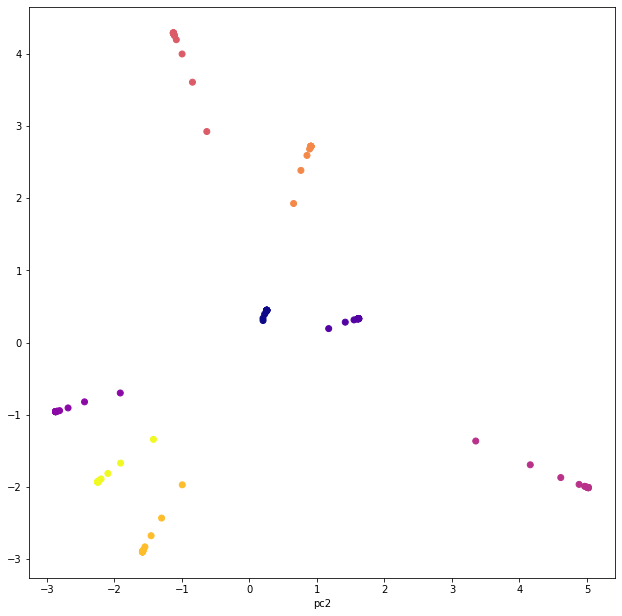

In [28]:
# Trial 1
fig,ax=plt.subplots()
fig.set_size_inches(10.5, 10.5)

# plt.figure(figsize=(10,10))
ax.scatter(mod_3_data.to_numpy()[:,0],mod_3_data.to_numpy()[:,1],c=mod_3_data.to_numpy()[:,3],cmap='plasma')
ax.set_xlabel('pc1')
ax.set_xlabel('pc2')
plt.show()
fig.savefig(result_folder+'hw2_2_notext.jpg',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')

In [29]:
new_data_df

,x,y,eps,time,trainAcc
0,0.202470,0.305828,0,0,0.12258
1,0.207476,0.297771,1,0,0.22322
2,0.202778,0.309624,2,0,0.27304
3,0.201556,0.336914,3,0,0.30146
4,0.208521,0.355795,4,0,0.32584
...,...,...,...,...,...
395,-2.246728,-1.929491,45,7,0.38192
396,-2.246732,-1.929493,46,7,0.38096
397,-2.246734,-1.929494,47,7,0.38052
398,-2.246736,-1.929496,48,7,0.38178


In [30]:
new_data_df2 = new_data_df

In [31]:

# train_acc_df = pd.DataFrame(train_acc).transpose()
# train_acc_data = np.array(train_acc_df).flatten()
# new_data_df['trainAcc'] = train_acc_data

test_acc_df = pd.DataFrame(val_acc).transpose()
test_acc_data = np.array(test_acc_df).flatten()
new_data_df2['testAcc'] = test_acc_data

In [32]:
new_data_df2

,x,y,eps,time,trainAcc,testAcc
0,0.202470,0.305828,0,0,0.12258,0.1779
1,0.207476,0.297771,1,0,0.22322,0.2742
2,0.202778,0.309624,2,0,0.27304,0.3095
3,0.201556,0.336914,3,0,0.30146,0.3332
4,0.208521,0.355795,4,0,0.32584,0.3523
...,...,...,...,...,...,...
395,-2.246728,-1.929491,45,7,0.38192,0.4020
396,-2.246732,-1.929493,46,7,0.38096,0.4021
397,-2.246734,-1.929494,47,7,0.38052,0.4020
398,-2.246736,-1.929496,48,7,0.38178,0.4021


In [33]:

# train_acc_df = pd.DataFrame(train_acc).transpose()
# train_acc_data = np.array(train_acc_df).flatten()
# new_data_df['trainAcc'] = train_acc_data

# test_acc_df = pd.DataFrame(val_acc).transpose()
# test_acc_data = np.array(test_acc_df).flatten()
# new_data_df2['testAcc'] = test_acc_data

train_loss_df = pd.DataFrame(train_loss).transpose()
train_loss_data = np.array(train_loss_df).flatten()
new_data_df2['train_loss'] = train_loss_data
new_data_df2

,x,y,eps,time,trainAcc,testAcc,train_loss
0,0.202470,0.305828,0,0,0.12258,0.1779,2.267709
1,0.207476,0.297771,1,0,0.22322,0.2742,2.095826
2,0.202778,0.309624,2,0,0.27304,0.3095,1.974029
3,0.201556,0.336914,3,0,0.30146,0.3332,1.895723
4,0.208521,0.355795,4,0,0.32584,0.3523,1.830328
...,...,...,...,...,...,...,...
395,-2.246728,-1.929491,45,7,0.38192,0.4020,1.651500
396,-2.246732,-1.929493,46,7,0.38096,0.4021,1.650179
397,-2.246734,-1.929494,47,7,0.38052,0.4020,1.651405
398,-2.246736,-1.929496,48,7,0.38178,0.4021,1.650817


In [34]:
# train_acc_df = pd.DataFrame(train_acc).transpose()
# train_acc_data = np.array(train_acc_df).flatten()
# new_data_df['trainAcc'] = train_acc_data

# test_acc_df = pd.DataFrame(val_acc).transpose()
# test_acc_data = np.array(test_acc_df).flatten()
# new_data_df2['testAcc'] = test_acc_data

# train_loss_df = pd.DataFrame(train_loss).transpose()
# train_loss_data = np.array(train_loss_df).flatten()
# new_data_df2['train_loss'] = train_loss_data

val_loss_df = pd.DataFrame(val_loss).transpose()
val_loss_data = np.array(val_loss_df).flatten()
new_data_df2['test_loss'] = val_loss_data
new_data_df2

,x,y,eps,time,trainAcc,testAcc,train_loss,test_loss
0,0.202470,0.305828,0,0,0.12258,0.1779,2.267709,2.174230
1,0.207476,0.297771,1,0,0.22322,0.2742,2.095826,1.995570
2,0.202778,0.309624,2,0,0.27304,0.3095,1.974029,1.896756
3,0.201556,0.336914,3,0,0.30146,0.3332,1.895723,1.822751
4,0.208521,0.355795,4,0,0.32584,0.3523,1.830328,1.762039
...,...,...,...,...,...,...,...,...
395,-2.246728,-1.929491,45,7,0.38192,0.4020,1.651500,1.596841
396,-2.246732,-1.929493,46,7,0.38096,0.4021,1.650179,1.596832
397,-2.246734,-1.929494,47,7,0.38052,0.4020,1.651405,1.596831
398,-2.246736,-1.929496,48,7,0.38178,0.4021,1.650817,1.596830


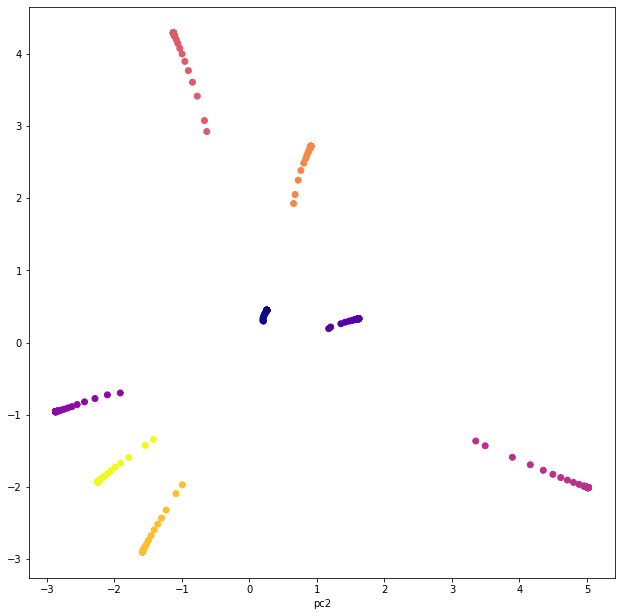

In [35]:
fig,ax=plt.subplots()
fig.set_size_inches(10.5, 10.5)

# plt.figure(figsize=(10,10))
ax.scatter(new_data_df2.to_numpy()[:,0],new_data_df2.to_numpy()[:,1],c=new_data_df2.to_numpy()[:,3],cmap='plasma')
ax.set_xlabel('pc1')
ax.set_xlabel('pc2')
plt.show()
fig.savefig(result_folder+'whole_model_no_text.jpg',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')

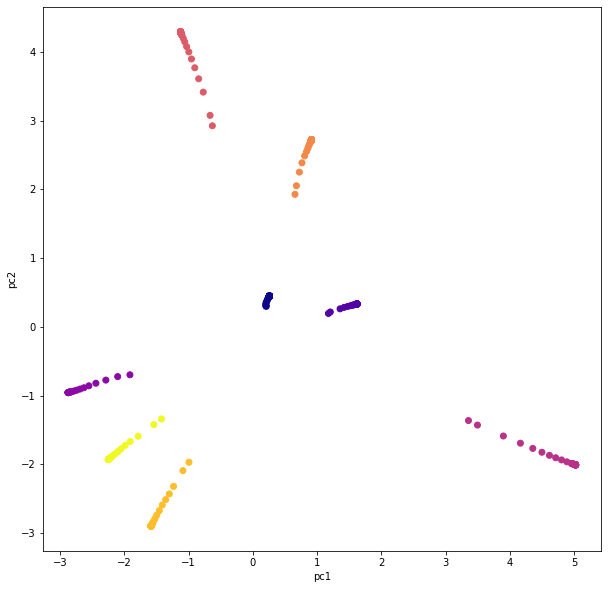

<Figure size 432x288 with 0 Axes>

In [36]:

plt.figure(figsize=(10,10))
plt.scatter(new_data_df2.to_numpy()[:,0],new_data_df2.to_numpy()[:,1],c=new_data_df2.to_numpy()[:,3],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()
plt.savefig(result_folder+'whole_model.jpg',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')

# Plotting Weights based on accuracy

In [57]:
all_df

,0,1,2,3,4,5,6,7,8,9,...,549974,549975,549976,549977,549978,549979,549980,549981,549982,549983
0,0.147136,0.159735,-0.045086,0.176787,-0.042167,0.038835,-0.093695,0.113023,0.169653,-0.141187,...,-0.065505,-0.056050,-0.076663,0.076740,-0.057973,-0.022953,-0.034894,0.004021,0.011802,0.050585
1,0.143714,0.155723,-0.040989,0.172479,-0.041104,0.036140,-0.090232,0.107543,0.163965,-0.133029,...,-0.065838,-0.062083,-0.070788,0.082475,-0.060437,-0.025948,-0.028322,0.002846,0.006168,0.047553
2,0.144346,0.155090,-0.037872,0.174486,-0.041053,0.039145,-0.088216,0.107135,0.165876,-0.131060,...,-0.065724,-0.061268,-0.073323,0.081495,-0.060515,-0.026468,-0.026081,0.001601,0.001423,0.045776
3,0.141844,0.151753,-0.039203,0.172948,-0.043600,0.039300,-0.091427,0.103061,0.164548,-0.133724,...,-0.064799,-0.060548,-0.075655,0.082060,-0.061119,-0.026637,-0.023569,0.001807,-0.003322,0.045987
4,0.141652,0.151612,-0.038679,0.173312,-0.043852,0.040008,-0.093161,0.101379,0.164465,-0.134339,...,-0.065475,-0.058700,-0.075864,0.082303,-0.061187,-0.027382,-0.023251,0.002181,-0.004678,0.046530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,-0.090984,-0.201902,0.150003,0.052557,0.107480,0.079811,0.188865,0.176098,-0.016530,0.066408,...,-0.043839,-0.008325,-0.068857,0.079590,-0.068669,-0.053184,-0.040554,-0.045428,-0.009380,0.073402
6,-0.093841,-0.205047,0.145436,0.052571,0.107361,0.077832,0.189880,0.176689,-0.017412,0.066115,...,-0.044292,-0.006297,-0.069357,0.080045,-0.068959,-0.052352,-0.040438,-0.045129,-0.010579,0.072007
7,-0.097945,-0.209510,0.138902,0.050830,0.105561,0.073632,0.188813,0.175399,-0.020570,0.065135,...,-0.044368,-0.005030,-0.070765,0.079556,-0.069446,-0.052580,-0.040184,-0.045844,-0.010760,0.071283
8,-0.097646,-0.209278,0.137063,0.051274,0.106192,0.072179,0.189310,0.176015,-0.021509,0.068766,...,-0.043676,-0.003472,-0.072885,0.078953,-0.070043,-0.050031,-0.040869,-0.045965,-0.012714,0.070287


# 

In [66]:
# t1

In [67]:

# t1 = np.array(t1)
pca2 = PCA(n_components=1)
new_data = pca2.fit_transform(t1)
scaling=StandardScaler()
scaled_data = scaling.fit_transform(new_data)

new_data_df = pd.DataFrame(new_data,columns=['y'])

eps_each_time = [i for i in range(num_epochs)] * num_of_times
times = np.repeat([i for i in range(num_of_times)],num_epochs)

new_data_df['eps']=eps_each_time
new_data_df['time']=times
new_data_df

,y,eps,time
0,-3.138940,0,0
1,-3.000422,1,0
2,-3.129944,2,0
3,-3.215612,3,0
4,-3.274938,4,0
...,...,...,...
75,12.348189,5,7
76,12.512619,6,7
77,12.641069,7,7
78,12.734498,8,7


In [68]:
new_df3=new_data_df

In [69]:
train_acc_df = pd.DataFrame(train_acc).transpose()
train_acc_data = np.array(train_acc_df).flatten()
new_df3['trainAcc'] = train_acc_data

test_acc_df = pd.DataFrame(val_acc).transpose()
test_acc_data = np.array(test_acc_df).flatten()
new_df3['testAcc'] = test_acc_data

train_loss_df = pd.DataFrame(train_loss).transpose()
train_loss_data = np.array(train_loss_df).flatten()
new_df3['train_loss'] = train_loss_data

val_loss_df = pd.DataFrame(val_loss).transpose()
val_loss_data = np.array(val_loss_df).flatten()
new_df3['test_loss'] = val_loss_data

In [70]:
new_df3

,y,eps,time,trainAcc,testAcc,train_loss,test_loss
0,-3.138940,0,0,0.20134,0.3037,2.235598,2.147916
1,-3.000422,1,0,0.31260,0.3807,2.137448,2.074833
2,-3.129944,2,0,0.35588,0.4038,2.098118,2.050912
3,-3.215612,3,0,0.38720,0.4308,2.068185,2.024758
4,-3.274938,4,0,0.40650,0.4561,2.047704,2.001936
...,...,...,...,...,...,...,...
75,12.348189,5,7,0.41876,0.4611,2.037070,1.996450
76,12.512619,6,7,0.43984,0.4906,2.018027,1.970648
77,12.641069,7,7,0.45298,0.5002,2.004263,1.962687
78,12.734498,8,7,0.47066,0.5138,1.987358,1.946026


In [71]:
iter1_df = new_df3[new_df3.time==0]
iter1_df

,y,eps,time,trainAcc,testAcc,train_loss,test_loss
0,-3.138940,0,0,0.20134,0.3037,2.235598,2.147916
1,-3.000422,1,0,0.31260,0.3807,2.137448,2.074833
2,-3.129944,2,0,0.35588,0.4038,2.098118,2.050912
3,-3.215612,3,0,0.38720,0.4308,2.068185,2.024758
4,-3.274938,4,0,0.40650,0.4561,2.047704,2.001936
5,-3.325627,5,0,0.42702,0.4703,2.029515,1.988726
6,-3.361697,6,0,0.44120,0.4665,2.015285,1.989430
7,-3.396139,7,0,0.44638,0.4915,2.010136,1.969469
8,-3.424030,8,0,0.46654,0.5063,1.990856,1.955308
9,-3.442637,9,0,0.47720,0.5298,1.979494,1.933477


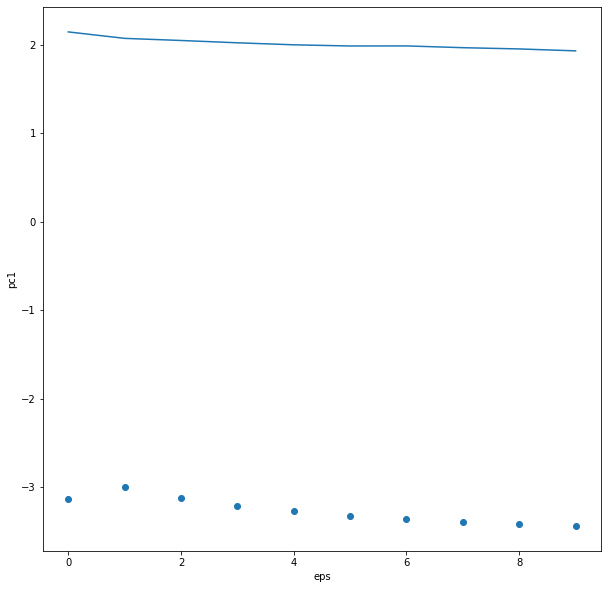

<Figure size 432x288 with 0 Axes>

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(iter1_df.to_numpy()[:,1],iter1_df.to_numpy()[:,0])
plt.plot(iter1_df.to_numpy()[:,1], iter1_df.to_numpy()[:,6])
plt.xlabel('eps')
plt.ylabel('pc1')
plt.show()
plt.savefig(result_folder+'whole_model_iter1_loss_vs_eps_point.jpg',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')

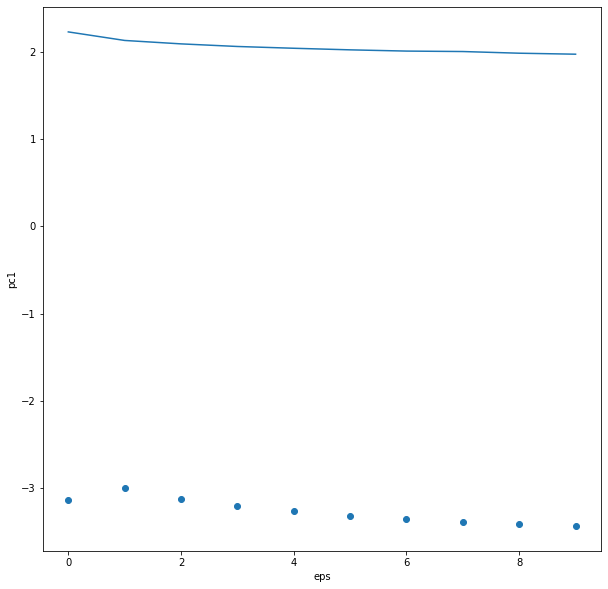

<Figure size 432x288 with 0 Axes>

In [73]:
# plt.figure(figsize=(10,10))
# plt.scatter(iter1_df.to_numpy()[:,1],iter1_df.to_numpy()[:,0])
# plt.plot(iter1_df.to_numpy()[:,1], iter1_df.to_numpy()[:,5])
# plt.xlabel('eps')
# plt.ylabel('pc1')
# plt.show()
# plt.savefig(result_folder+'whole_model_iter1_train_loss_vs_eps_point.jpg',
#             format='jpeg',
#             dpi=700,
#             bbox_inches='tight')

In [46]:
text = list(mod_3_data.trainAcc)
text[0]

0.20134

In [80]:
# x= list(mod_3_data.x)
# y = list(mod_3_data.y)
# text = [str(i) for i in list(mod_3_data.trainAcc)]

# fig, ax = plt.subplots()
# # ax.plot(x, y, 'ro',markersize=12)
# count=0
# for i,j,t in zip(x,y,text):
#     ax.annotate(t,  xy=(i, j), color='black',
#                 fontsize="large", weight='heavy',
#                 horizontalalignment='center',
#                 verticalalignment='center')


# # ax.annotate(text,(x,y),(x,y))


# # instanciate a figure and ax object
# # annotate is a method that belongs to axes
# # ax.plot(x, y, 'ro',markersize=23)

# # ## controls the extent of the plot.
# # offset = 1.0 
# # ax.set_xlim(min(x)-offset, max(x)+ offset)
# # ax.set_ylim(min(y)-offset, max(y)+ offset)

# # # loop through each x,y pair
# # for i,j in zip(x,y):
# #     print(j)
# #     ax.annotate(str(text[(j)]))

# plt.show()

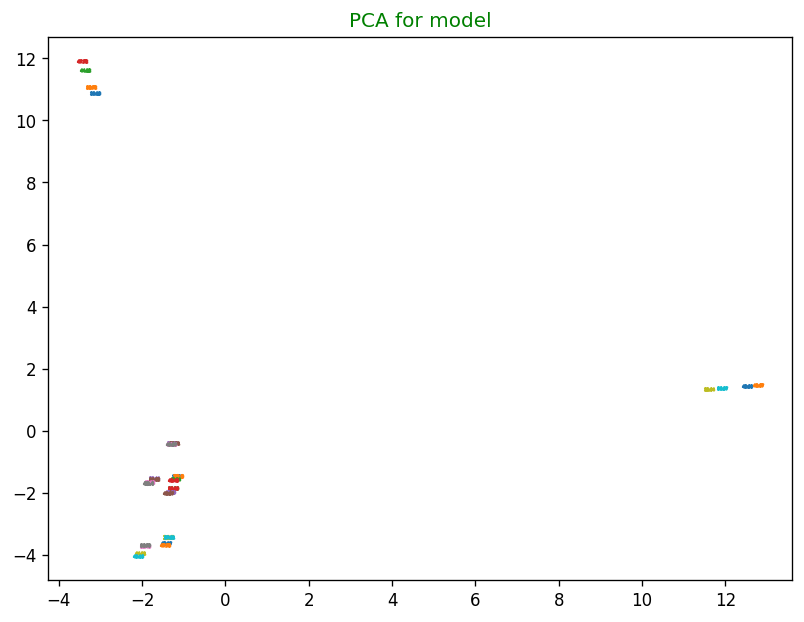

In [27]:
plt.figure(figsize=(8,6),dpi=120)
for i in range(len(mv)):

    m = mv[i]
    #print(m)
    plt.scatter(np.array(mod_3_data.x)[i],np.array(mod_3_data.y)[i],marker=f'${m}$')
    plt.title("PCA for model",color="g")

plt.savefig(result_folder+'hw2_2.jpg',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')
plt.show()

In [163]:
# mod_3_data[['x','y']].plot()

In [ ]:
# from matplotlib.pyplot import figure

# figure(figsize=(8, 6), dpi=80)



In [192]:

plt.figure(figsize=(10,10),dpi=1080)
m = [str(int(i * 100)) for i in mod_3_data.trainAcc ]
c_map = [i for i in mod_3_data.time]
X = [i for i in mod_3_data.x]
Y = [i for i in mod_3_data.y]
# plt.scatter(X,Y,marker='{.2}'.format(m))
plt.scatter(X, Y, marker=f'${m}$',c=c_map)
plt.title("PCA for model")
# # m
plt.show()

In [81]:
# # z = (mod_3_data['x'] + mod_3_data['y'])
# # markerVal = np.array(list(test_acc.values()))
# for index,row in mod_3_data.iterrows():
# #     print(row.trainAcc)
#     m = str(row.trainAcc)
#     print(m)
#     plt.scatter(row.x,row['y'],marker=,s=40)
# #     plt.text(row.x,row.y,s=np.around(row.trainAcc,2))
#     plt.title("PCA for model",color="g")

# plt.savefig('wts.jpg',
#             format='jpeg',
#             dpi=700,
#             bbox_inches='tight')

In [82]:
# z = (mod_3_data['x'] + mod_3_data['y'])
# # markerVal = np.array(list(test_acc.values()))
# for i in range(len(mod_3_data)):
#     m = mod_3_data['trainAcc'][i]
#     plt.scatter(mod_3_data['x'][i],mod_3_data['y'][i],marker='${.2f}$',s=40)
#     plt.title("PCA for model",color="g")

# # plt.savefig('wts.jpg',
# #             format='jpeg',
# #             dpi=700,
# #             bbox_inches='tight')


In [121]:
# train_acc_df

,0,1,2,3,4,5,6,7,8,9
0,0.09992,0.11326,0.19416,0.22342,0.24092,0.25862,0.26518,0.27738,0.28318,0.28756
1,0.11036,0.10000,0.16952,0.22644,0.25494,0.28084,0.29432,0.31020,0.32480,0.33228
2,0.10000,0.11534,0.19482,0.22758,0.24960,0.25962,0.26768,0.27546,0.28830,0.29782
3,0.09938,0.10840,0.19484,0.23588,0.26168,0.27170,0.28530,0.29622,0.30412,0.31122
4,0.09946,0.10020,0.17114,0.22722,0.26116,0.27762,0.28734,0.29612,0.30690,0.31572
5,0.11504,0.10356,0.16246,0.21994,0.25258,0.26144,0.27964,0.28934,0.29898,0.31210
6,0.09910,0.13426,0.16762,0.21574,0.24642,0.26078,0.27200,0.28582,0.29388,0.30360
7,0.11276,0.11158,0.20564,0.23604,0.24398,0.24390,0.25344,0.25484,0.25738,0.25984


array([0.09992, 0.11326, 0.19416, 0.22342, 0.24092, 0.25862, 0.26518,
       0.27738, 0.28318, 0.28756, 0.11036, 0.1    , 0.16952, 0.22644,
       0.25494, 0.28084, 0.29432, 0.3102 , 0.3248 , 0.33228, 0.1    ,
       0.11534, 0.19482, 0.22758, 0.2496 , 0.25962, 0.26768, 0.27546,
       0.2883 , 0.29782, 0.09938, 0.1084 , 0.19484, 0.23588, 0.26168,
       0.2717 , 0.2853 , 0.29622, 0.30412, 0.31122, 0.09946, 0.1002 ,
       0.17114, 0.22722, 0.26116, 0.27762, 0.28734, 0.29612, 0.3069 ,
       0.31572, 0.11504, 0.10356, 0.16246, 0.21994, 0.25258, 0.26144,
       0.27964, 0.28934, 0.29898, 0.3121 , 0.0991 , 0.13426, 0.16762,
       0.21574, 0.24642, 0.26078, 0.272  , 0.28582, 0.29388, 0.3036 ,
       0.11276, 0.11158, 0.20564, 0.23604, 0.24398, 0.2439 , 0.25344,
       0.25484, 0.25738, 0.25984])

In [115]:
# type(train_acc)

dict

In [83]:
# train_acc_df[train_acc_df.columns[-1]]

In [76]:
train_acc_df.shape

(8, 10)

In [84]:

# plt.figure(figsize=(10,10))
# plt.scatter(mod_3_data.to_numpy()[:,0],mod_3_data.to_numpy()[:,1],c=mod_3_data.to_numpy()[:,3],cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

32

[0, 1, 2, 3]

(10, 4)

32

In [40]:
# new_point_df = point_df

In [42]:
# new_point_df["eps"] = eps_list

In [45]:
# new_point_df

In [44]:
# point_df

In [18]:
# point_df.to_csv("Points_15Eps_8_times_continuation_model_9_mode_3_data.csv",index=False)

In [132]:
# new_data_df.to_csv(result_folder+"new_data.csv",index=False)
# mod_3_data.to_csv(result_folder+"mod_3_data.csv",index=False)

In [13]:
# test_df = point_df

In [14]:
# test_df.to_numpy()[:,2]

In [153]:
# import numpy as np; np.random.seed(2)
# import matplotlib.pyplot as plt

# xy = np.random.rand(10,2)

# plt.figure()
# for index,row in mod_3_data.iterrows():
# #     print(row)
# #     break
#     plt.text(row.x,row.y,row.trainAcc, ha="center", va="center")

# plt.show()

In [85]:
# import numpy as np; np.random.seed(2)
# import matplotlib.pyplot as plt

# xy = np.random.rand(10,2)

# plt.figure()
# for i, ((x,y),) in enumerate(zip(xy)):
#     plt.text(x,y,i, ha="center", va="center")

# plt.show()

In [154]:

# plt.figure(figsize=(10,10))
# plt.text(new_point_df.to_numpy()[:,0],new_point_df.to_numpy()[:,1],c=new_point_df.to_numpy()[:,3],cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

Text(0, 0.5, 'pc2')

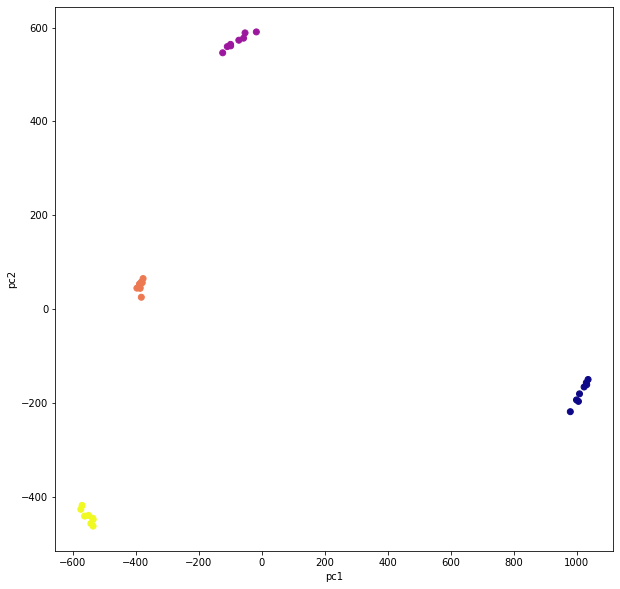

In [53]:

# plt.figure(figsize=(10,10))
# plt.scatter(new_point_df.to_numpy()[:,0],new_point_df.to_numpy()[:,1],c=new_point_df.to_numpy()[:,3],cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

In [86]:

# plt.figure(figsize=(10,10))
# plt.scatter(point_df.to_numpy()[:,0],point_df.to_numpy()[:,1],c=point_df.to_numpy()[:,2],cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

In [16]:
# print("Model 1")
# # cifar_model1 = Cifar_model1()
# step1 = 0.0004   
# gamma_lr_scheduler1 = 0.1
# criterion1 = nn.CrossEntropyLoss()
# weight_decay1 = 1e-4

# # optimizer = optim.SGD(model.parameters(), lr=0.001)
# optimizer1 = torch.optim.Adam(cifar_model1.parameters(),lr = step1,weight_decay=weight_decay1)

# exp_lr_scheduler1 = lr_scheduler.StepLR(
#     optimizer1, step_size=10, gamma=gamma_lr_scheduler1
# )
# model_name1 = "CifarModel1"

In [17]:
# cifar_model1,grad_norm_per_epoch1,train_losses1,val_losses1,train_acc1,val_acc1,model_wts_epoch1,sensitivity = py_train_helper.train_model(cifar_model1,criterion1,optimizer1,exp_lr_scheduler1,model_name1,num_epochs=num_epochs)